<h2 style="color: #fff;">
    Alura Care
</h2>

<p style="color: #b4b4bb;">
    Startup de exemplo que tem como objetivo classificar cancers como benigno ou maligno de acordo com exames realizados pelos pacientes.
</p>

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

uri = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'

data = pd.read_csv(uri)
data.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


<h4 style="color: #fff;">
    Segregando os dados
</h4>

In [24]:
x = data.drop(columns=['id', 'diagnostico', 'exame_33']) # Removendo a coluna "exame_33" porque ela possui muitos dados inconsistentes (nullos)
y = data['diagnostico']

<h4 style="color: #fff;">
    Criando o modelo de classificação Random Forest
</h4>

<p style="color: #b4b4bb;">
    Basicamente o Random Forest cria várias arvores de decisão para classificar os dados.
</p>

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

SEED = 123143
np.random.seed(SEED)

# test_size = Tamanho dos dados de teste (0.3 é igual a 30% de todos os dados)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

# n_estimators = Número de arvores de classificação que será utilizado pelo Random forest
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(train_x, train_y)

rfc_model_accuracy = rfc_model.score(test_x, test_y)
print('Random Forest accuracy: %.2f%%' % (rfc_model_accuracy * 100))

Random Forest accuracy: 92.40%


<h4 style="color: #fff;">
    Modelo base com Dummy Classifier
</h4>

<p style="color: #b4b4bb;">
    O Dummy Classifier nos ajuda a criar uma baseline para termos noção o quão bom um classificador se sai comparado ao valor gerado pelo Dummy.
</p>

In [26]:
from sklearn.dummy import DummyClassifier

SEED = 123143
np.random.seed(SEED)

# strategy = Estratégia que o Dummy Classifier deve usar para classificar os dados
# strategy "most_frequent" = Estratégia para classificar os dados mais frequentes encontrados
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(train_x, train_y)

dummy_model_accuracy = dummy_model.score(test_x, test_y)
print('Dummy Classifier accuracy: %.2f%%' % (dummy_model_accuracy * 100))

Dummy Classifier accuracy: 66.67%


<h4 style="color: #fff;">
    Escalando e pré-processando os dados
</h4>

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_x = scaler.fit_transform(x)
scaled_x = pd.DataFrame(data=scaled_x, columns=x.keys())

scaled_x_transformed = scaled_x.drop(columns=['exame_29', 'exame_4'])

<h4 style="color: #fff;">
    Visualização dos exames
</h4>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

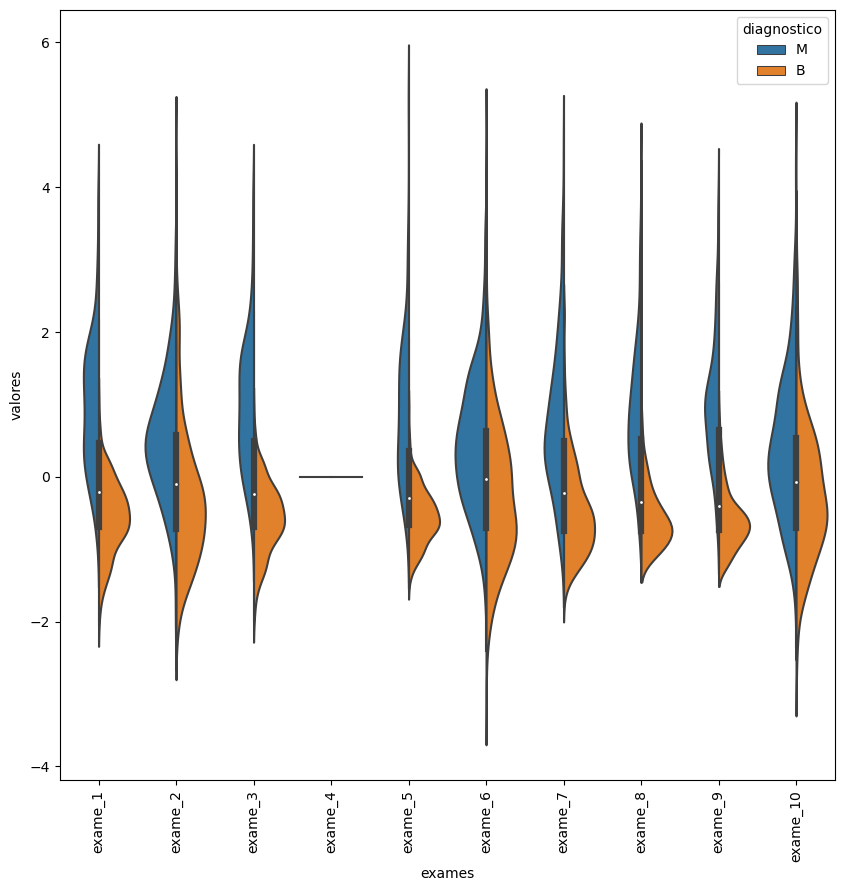

In [28]:
plot_data = pd.concat([y, scaled_x.iloc[:,0:10]], axis=1)
plot_data = pd.melt(plot_data, id_vars='diagnostico', var_name='exames', value_name='valores')

plt.figure(figsize=(10, 10))
sns.violinplot(x='exames', y='valores', hue='diagnostico', data=plot_data, split=True)

plt.xticks(rotation=90)

<h4 style="color: #fff;">
    Visualização dos exames corelacionados no mapa de calor
</h4>

<AxesSubplot:>

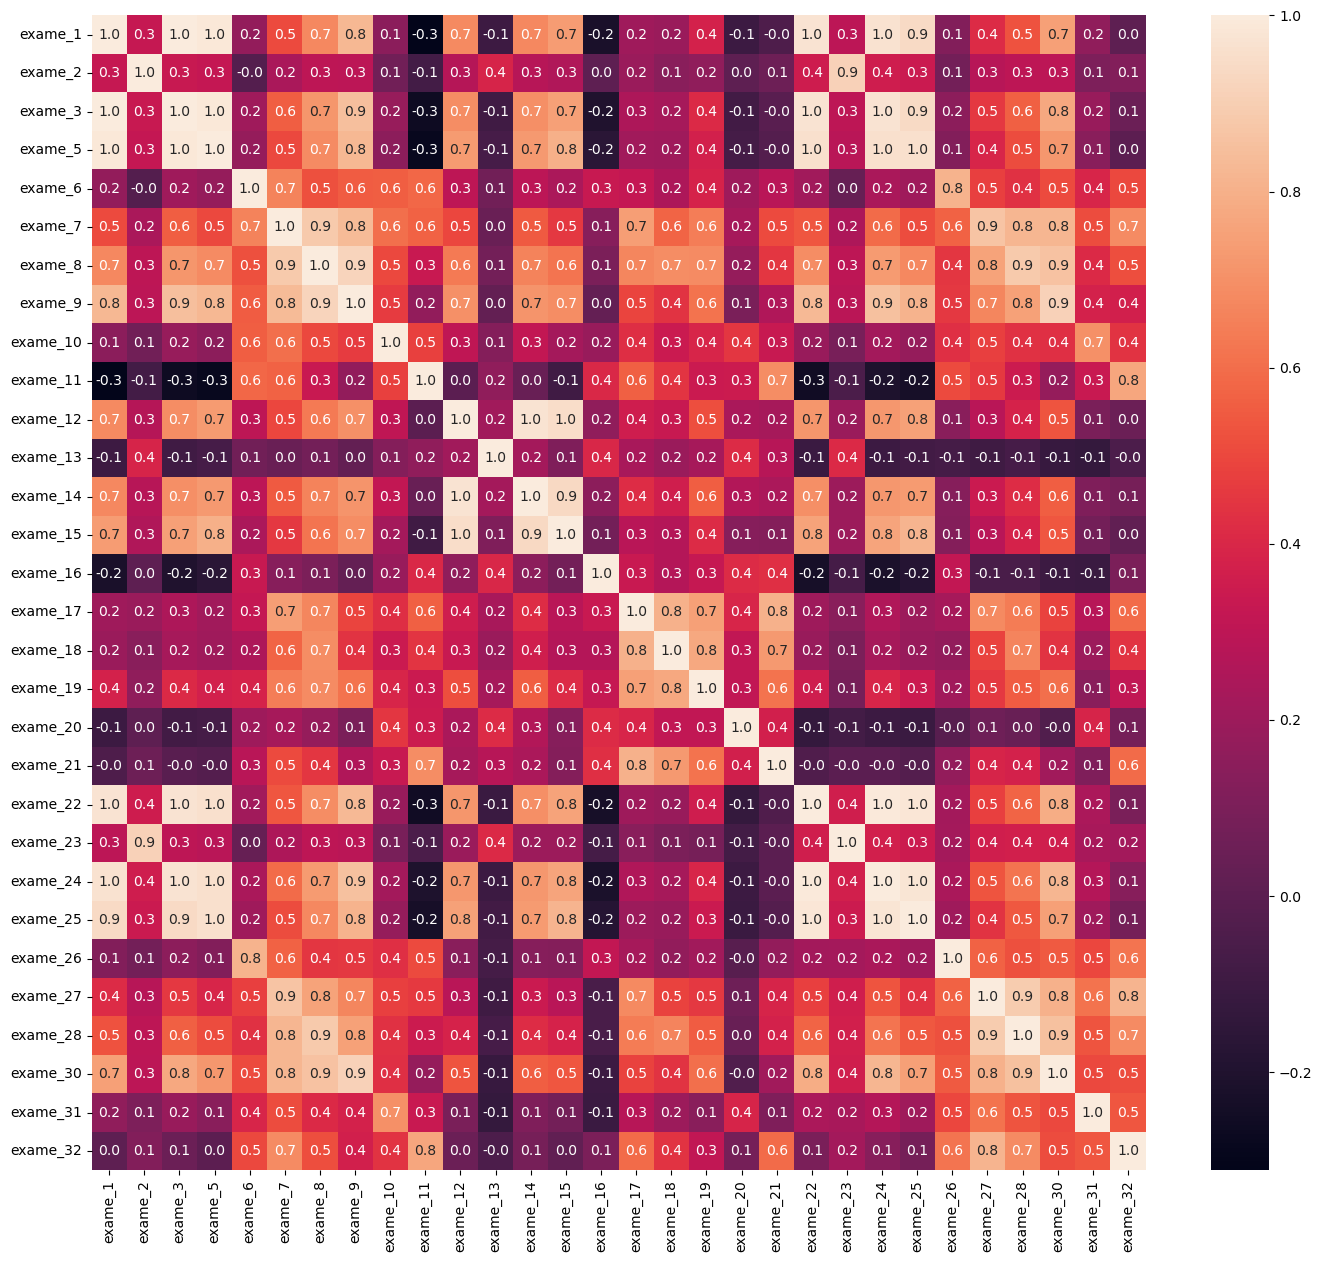

In [29]:
correlation_matrix = scaled_x_transformed.corr()

plt.figure(figsize=(17, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f')

In [30]:
from sklearn.feature_selection import SelectKBest, chi2

x = x.drop(columns=['exame_3', 'exame_4', 'exame_24', 'exame_29'])

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

kbest_model = SelectKBest(chi2, k=5)
kbest_model.fit(train_x, train_y)

kbest_train = kbest_model.transform(train_x)
kbest_test = kbest_model.transform(test_x)

kbest_train

array([[  12.87,  512.2 ,   18.24,   13.9 ,  597.5 ],
       [  11.61,  408.2 ,   15.89,   12.64,  475.7 ],
       [  17.47,  984.6 ,  122.3 ,   23.14, 1660.  ],
       ...,
       [  15.71,  761.7 ,   27.94,   17.5 ,  922.8 ],
       [  19.4 , 1145.  ,   53.16,   23.79, 1628.  ],
       [  16.84,  880.2 ,   46.61,   18.22, 1032.  ]])

In [32]:
rfc_model = RandomForestClassifier(n_estimators=100, random_state=SEED)
rfc_model.fit(kbest_train, train_y)

rfc_model_accuracy = rfc_model.score(kbest_test, test_y)
print('Random Forest accuracy: %.2f%%' % (rfc_model_accuracy * 100))

Random Forest accuracy: 96.49%
